In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

### connect to database

In [38]:

mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'nima88',
    password = '',
    database = 'learn'

)

### use pandas to read our database:

In [39]:
df = pd.read_sql('SELECT * FROM toyota_MLTable' , mydb)
df = df.drop(['id'], axis=1)

print(df.head())

             name  year  age_miles    price
0  Toyota Prius c  2013     129623  $10,985
1     Toyota RAV4  2021      13905  $39,999
2    Toyota Camry  2018      55036  $17,995
3  Toyota Corolla  2020      71086  $16,000
4    Toyota Camry  2020      72283  $20,355


/tmp/ipykernel_5203/2984851063.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM toyota_MLTable' , mydb)


### Or Alternatively read from csv file:

In [40]:
# df = pd.read_csv('toyota_MLTable.csv')
# df

In [43]:
#### convert every item in 'price' column to integer:

df = df.replace({'price': r','}, {'price': ''}, regex=True)
df = df.replace({'price': r'\$'}, {'price': ''}, regex=True)

# print(ddf['Area'].to_string())

df['price'] = df['price'].astype(int)

print(df['price'].head())

0    10985
1    39999
2    17995
3    16000
4    20355
Name: price, dtype: int64


### Creating some useful plots:

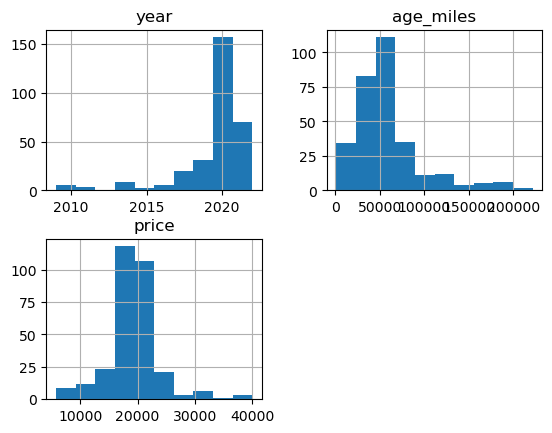

In [54]:
# print(df.describe())
df.hist()
plt.ylabel('Number')
plt.show()


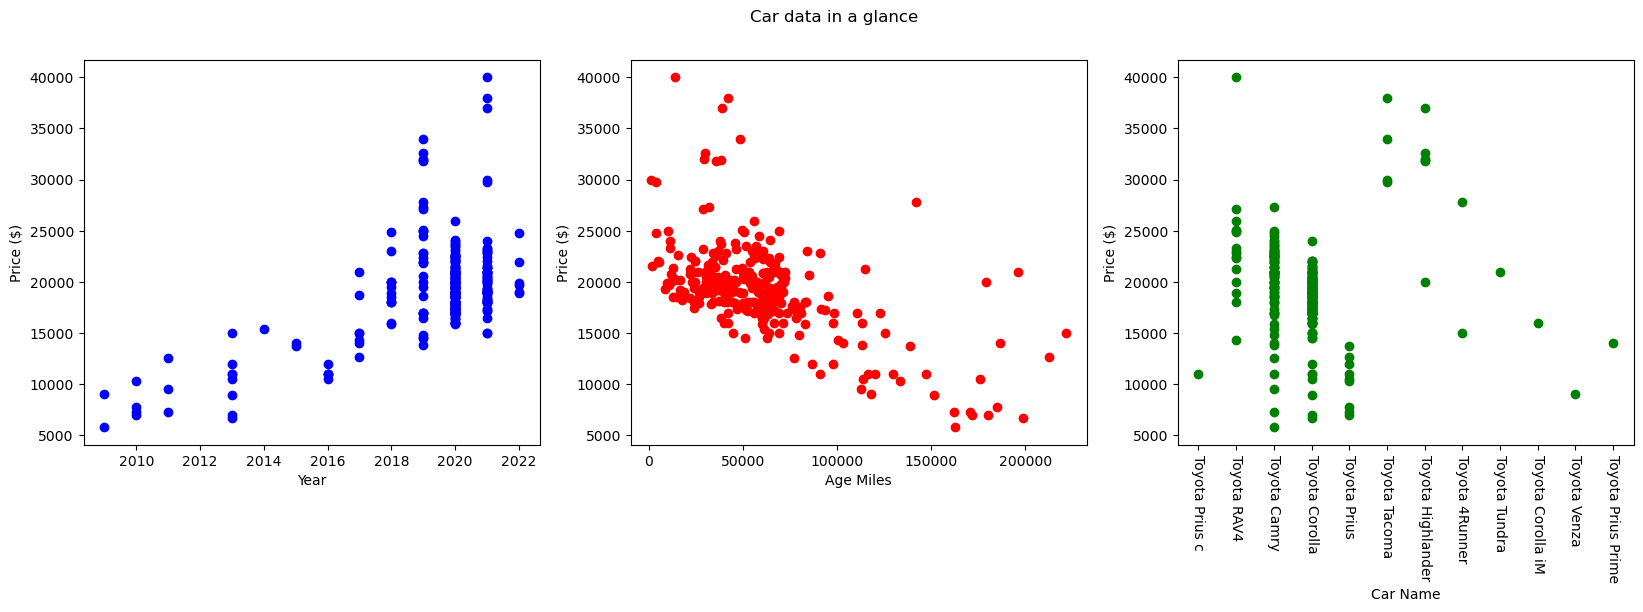

In [55]:
plt.figure(figsize=(20,5))


plt.subplot(131)
plt.scatter(df.year , df.price , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Price ($)')

plt.subplot(132)
plt.scatter(df.age_miles , df.price , color = 'red')
plt.xlabel('Age Miles')
plt.ylabel('Price ($)')

plt.subplot(133)
plt.scatter(df.name , df.price , color = 'green')
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(270)
plt.xlabel('Car Name')
plt.ylabel('Price ($)')

plt.suptitle('Car data in a glance')
plt.savefig('car_data.png', bbox_inches = 'tight')

plt.show()

## There are direct relationship between Age Miles and Year of the cat to its Price, but not a very logical connection between the car name and its price.

# Modeling 
# 1. Simple Linear Regression

In [150]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [175]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

xmax = max(np.asanyarray(train[['year']]))
ymax = max(np.asanyarray(train[['price']]))

x_train = np.asanyarray(train[['year']]) 
y_train = np.asanyarray(train[['price']]) 

regr.fit(x_train , y_train)
print('coef: ' , regr.coef_[0,0])
print('intercept: ' , regr.intercept_[0])

coef:  1229.1345739130431
intercept:  -2462849.938460869


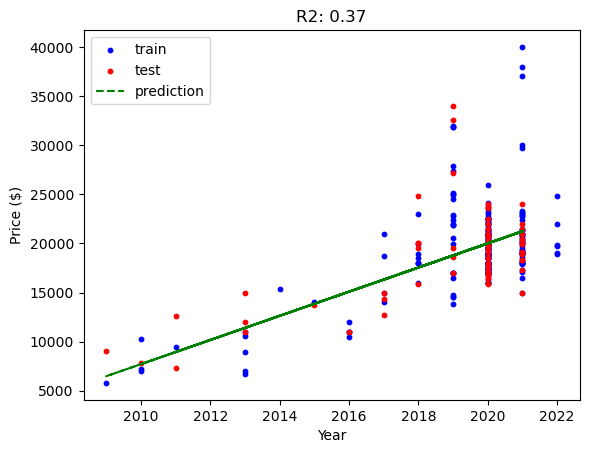

In [176]:
from sklearn.metrics import r2_score
xmax = max(np.asanyarray(test[['year']]))
ymax = max(np.asanyarray(test[['price']]))
x_test = np.asanyarray(test[['year']]) 
y_test = np.asanyarray(test[['price']]) 

y_hat = regr.predict(x_test)

r2 = r2_score(y_test , y_hat)
plt.scatter(x_train , y_train , color = 'blue' , label = 'train' , s =10)
plt.scatter(x_test , y_test , color = 'red' , label = 'test' , s= 10)
plt.plot(x_test , y_hat , 'g--' , label = 'prediction')
plt.legend(loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Price ($)')

plt.title('R2: %.2f' %r2)
plt.savefig('year_price.png', bbox_inches = 'tight')

plt.show()

In [177]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

xmax = max(np.asanyarray(train[['age_miles']]))
ymax = max(np.asanyarray(train[['price']]))

x_train = np.asanyarray(train[['age_miles']]) 
y_train = np.asanyarray(train[['price']]) 

regr.fit(x_train , y_train)
print('coef: ' , regr.coef_[0,0])
print('intercept: ' , regr.intercept_[0])

coef:  -0.06807362515717258
intercept:  23425.75222277057


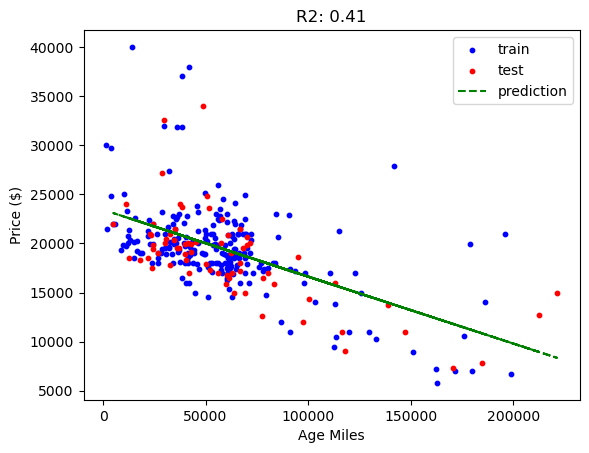

In [178]:
from sklearn.metrics import r2_score
xmax = max(np.asanyarray(test[['age_miles']]))
ymax = max(np.asanyarray(test[['price']]))
x_test = np.asanyarray(test[['age_miles']]) 
y_test = np.asanyarray(test[['price']]) 

y_hat = regr.predict(x_test)

r2 = r2_score(y_test , y_hat)
plt.scatter(x_train , y_train , color = 'blue' , label = 'train' , s =10)
plt.scatter(x_test , y_test , color = 'red' , label = 'test' , s= 10)
plt.plot(x_test , y_hat , 'g--' , label = 'prediction')
plt.legend(loc = 'upper right')
plt.xlabel('Age Miles')
plt.ylabel('Price ($)')

plt.title('R2: %.2f' %r2)
plt.savefig('age_price.png', bbox_inches = 'tight')

plt.show()

# 2. Multiple Linear Regression

In [187]:
### convert names to int-type

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ids = le.fit(df['name'])
###############################
# print(mapping) keep a dictionary from converting name to int


mapping = dict(zip(le.classes_, range(len(le.classes_))))


#################################
# print(le.transform(df['name']))

ddf = df
ddf['name'] = le.transform(ddf['name'])


In [192]:
# ddf

,name,year,age_miles,price
0,7,2013,129623,10985
1,8,2021,13905,39999
2,1,2018,55036,17995
3,2,2020,71086,16000
4,1,2020,72283,20355
...,...,...,...,...
298,2,2021,40627,20679
299,1,2020,63748,20498
300,1,2019,31940,27336
301,9,2019,48526,33999


In [188]:
msk = np.random.rand(len(ddf)) < 0.8
train = ddf[msk]
test = ddf [~msk]

In [189]:
x_train = np.asanyarray(train[['name' , 'year' , 'age_miles']]) 
y_train = np.asanyarray(train[['price']]) 

regr.fit(x_train , y_train)
print('coef: ' , regr.coef_)
print('intercept: ' , regr.intercept_)

coef:  [[ 7.32763691e+02  9.21892387e+02 -3.41234869e-02]]
intercept:  [-1842264.12931318]


In [191]:
from sklearn.metrics import r2_score

x_test = np.asanyarray(test[['name' , 'year' , 'age_miles']]) 
y_test = np.asanyarray(test[['price']]) 

y_hat = regr.predict(x_test)

r2 = r2_score(y_test , y_hat)
print('R2: %.2f' % r2)

R2: 0.22


# 3. Decision Tree Regression with AdaBoost

In [239]:
ddf = ddf.sort_values(by='year')
ddf

,name,year,age_miles,price
158,1,2009,162628,5800
221,11,2009,118019,9000
215,5,2010,162296,7250
247,5,2010,184900,7799
160,5,2010,133255,10300
...,...,...,...,...
147,2,2022,10966,19694
270,1,2022,3969,24800
236,2,2022,4901,21988
178,2,2022,9550,19878


In [270]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.asanyarray(ddf[['year']]) 
y = np.asanyarray(ddf[['price']])


regr_1 = DecisionTreeRegressor(max_depth=4)
n = 100
regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3), n_estimators=n, random_state=rng
)

In [271]:
regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

/home/nima/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


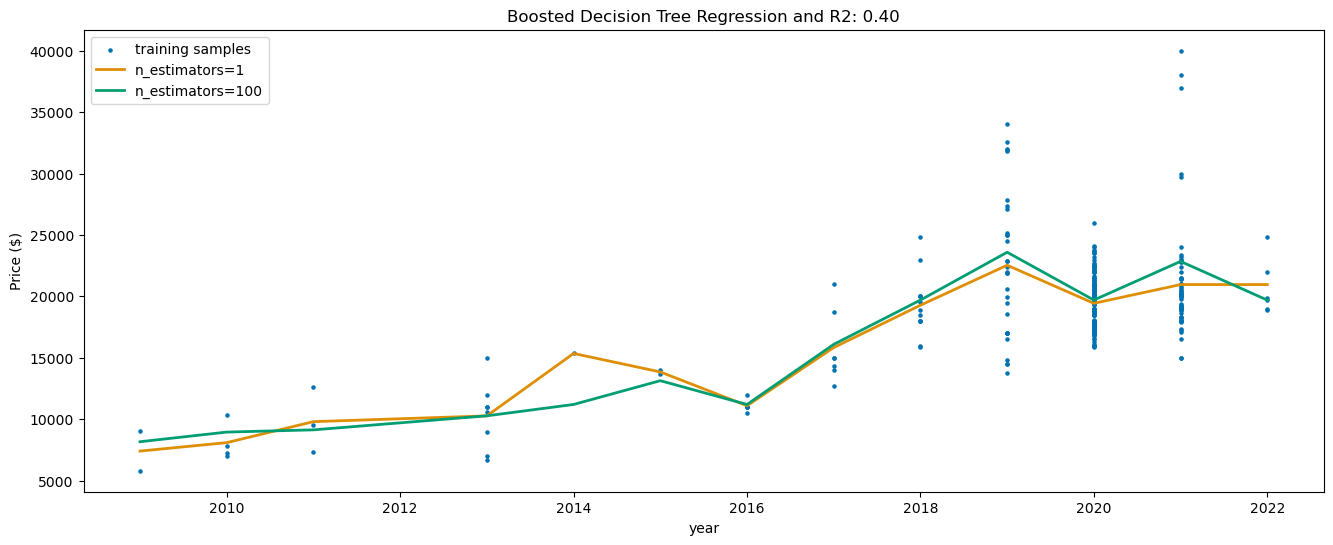

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

colors = sns.color_palette("colorblind")

plt.figure(figsize=(16,6))
plt.scatter(X, y, color=colors[0], label="training samples" , s=5)
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators={0}".format(n), linewidth=2)

r2 = r2_score(y , y_2)
# print('R2: %.2f' % r2)


plt.xlabel("year")
plt.ylabel("Price ($)")
plt.title("Boosted Decision Tree Regression and R2: %.2f" %r2)
plt.legend()
plt.savefig('Dec_Tree_reg.png', bbox_inches = 'tight')

plt.show()





# 4. Polynomial Regression

In [294]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

msk = np.random.rand(len(ddf)) < 0.8
train = ddf[msk]
test = ddf [~msk]

train_x = np.asanyarray(train[['year']])
train_y = np.asanyarray(train[['price']])

test_x = np.asanyarray(test[['year']])
test_y = np.asanyarray(test[['price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
print(train_x[:3])
print(train_x_poly[:3])
print(train_y[:3])


[[2009]
 [2010]
 [2010]]
[[1.000000e+00 2.009000e+03 4.036081e+06]
 [1.000000e+00 2.010000e+03 4.040100e+06]
 [1.000000e+00 2.010000e+03 4.040100e+06]]
[[9000]
 [7250]
 [7799]]


In [295]:
regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.00000000e+00  1.85139896e+05 -4.56280355e+01]]
Intercept:  [-1.87781932e+08]


0.32780816586127315


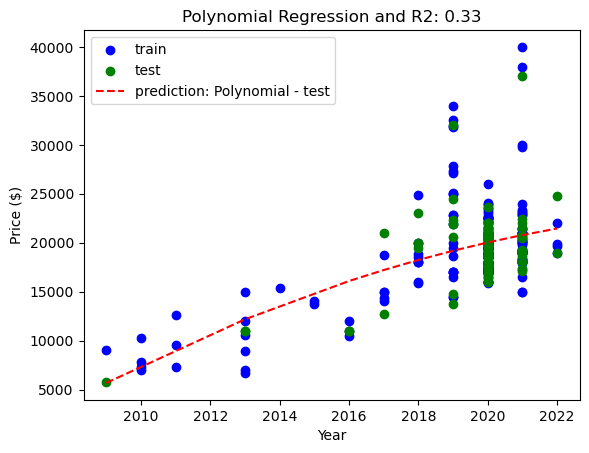

In [298]:
from sklearn.metrics import r2_score


plt.scatter(train.year, train.price,  color='blue' , label = 'train')

XX = np.arange(2010, 2022, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
# plt.plot(XX, yy, '-r'  , label = 'prediction: Polynomial')
plt.xlabel("Year")
plt.ylabel("Price ($)")



test_x_poly = poly.fit_transform(test_x)
# print(test_x_poly)
test_y_ = regr.predict(test_x_poly)

plt.scatter(test.year, test.price,  color='green' , label = 'test')
plt.plot(test_x, test_y_, '--r'  , label = 'prediction: Polynomial - test')


# print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
# print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )
r2 = r2_score(test_y,test_y_ )
print(r2)
plt.title('Polynomial Regression and R2: %.2f' %r2)
plt.legend(loc = 'upper left')
plt.savefig('Poly_reg.png', bbox_inches = 'tight')
plt.show()


# 5. Non-Linear Regression

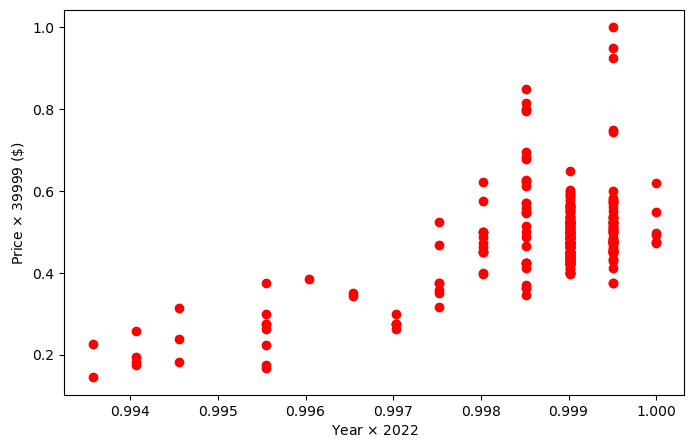

In [352]:
plt.figure(figsize=(8,5))

xmax = max(ddf['year'])
ymax = max(ddf['price'])

x_data = ddf["year"]/xmax
y_data = ddf["price"] / ymax
plt.plot(x_data, y_data, 'ro')
plt.ylabel(r'Price $\times$ {0} (\$) '.format(ymax))
plt.xlabel(r'Year $\times$ {0}'.format(xmax) )
plt.show()

In [353]:
def sigmoid(X, a, b , c):
     y = a*np.power(X,3) + b*(np.power(X,2)) + c*X 
     return y

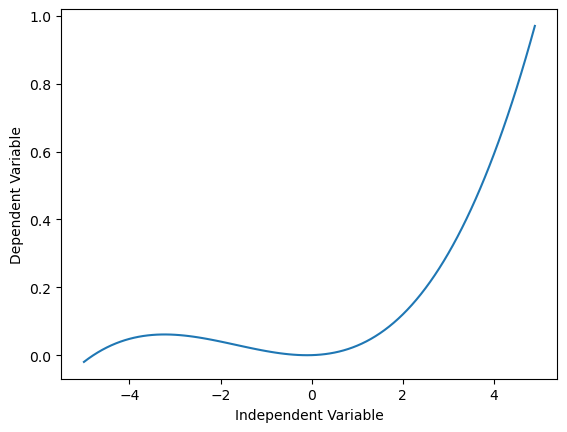

In [354]:
X = np.arange(-5.0, 5.0, 0.1)
a = .004
b = .020
c = .004

Y_pred = sigmoid(X, a , b , c)

plt.plot(X,Y_pred) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [355]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_data, y_data)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
print(popt)
print(pcov)
print(curve_fit(sigmoid, x_data, y_data))

 beta_1 = -4896.437275, beta_2 = 9823.316937
[-4896.43727516  9823.3169366  -4926.34418255]
[[  7619115.10714048 -15195347.08114346   7576264.88720808]
 [-15195347.08199214  30305190.78052091 -15109909.31203074]
 [  7576264.88805566 -15109909.31287724   7533677.12532323]]
(array([-4896.43727516,  9823.3169366 , -4926.34418255]), array([[  7619115.10714048, -15195347.08114346,   7576264.88720808],
       [-15195347.08199214,  30305190.78052091, -15109909.31203074],
       [  7576264.88805566, -15109909.31287724,   7533677.12532323]]))


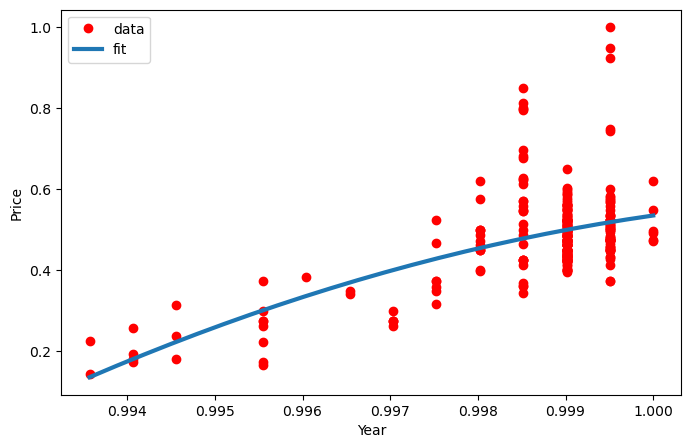

In [363]:
x = np.linspace(2009, 2022, 22)
x = x/max(x)


plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')


plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()